## RotateView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This `Op` wraps the `Views.rotate()` method of ImgLib2, rotating one axis of an image to become another axis. The `Op` is called as follows:

In [2]:
ij.op().help('rotateView')

Available operations:
	(IntervalView out) =
	net.imagej.ops.transform.rotateView.IntervalRotateView(
		RandomAccessibleInterval in,
		int fromAxis,
		int toAxis)
	(MixedTransformView out) =
	net.imagej.ops.transform.rotateView.DefaultRotateView(
		RandomAccessible in,
		int fromAxis,
		int toAxis)

Let's get an image so that we can show this `Op` in action:

[INFO] Populating metadata
[INFO] Populating metadata


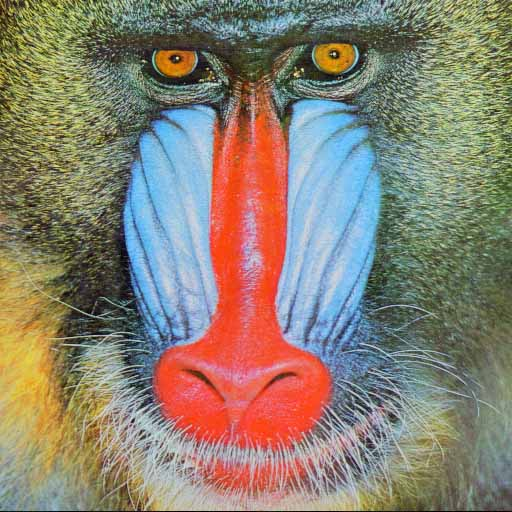

In [3]:
input = ij.scifio().datasetIO().open("https://imagej.net/images/baboon.jpg")

ij.notebook().display(input)

Let's say that we want to rotate this monkey 90 degrees clockwise. This requires changing axis 0 to become axis 1:

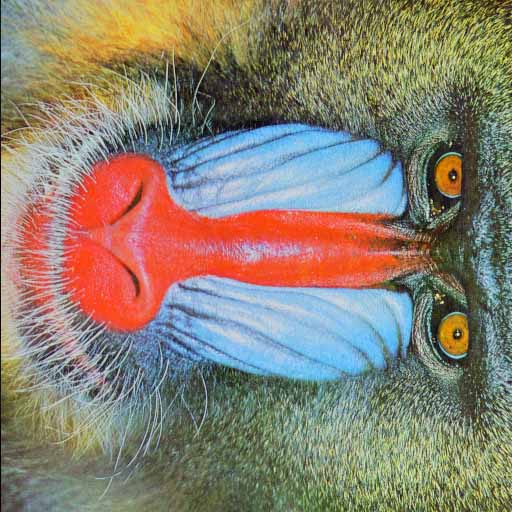

In [4]:
fromAxis = 0
toAxis = 1

rotated = ij.op().run("rotateView", input, fromAxis, toAxis)

ij.notebook().display(rotated)

If we want to rotate the monkey by 90 degrees counterclockwise, we can change axis 1 to become axis 0:

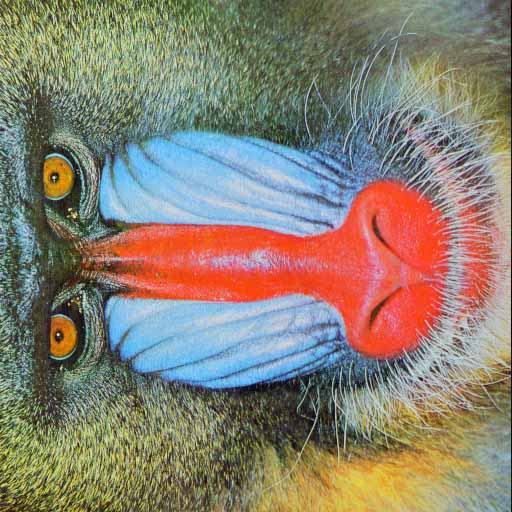

In [5]:
fromAxis = 1
toAxis = 0

rotated = ij.op().run("rotateView", input, fromAxis, toAxis)

ij.notebook().display(rotated)

Note that the outputs, `IntervalView` and `MixedTransformView`, extend the inputs required, `IterableInterval` and `RandomAccessible` respectively. Thus if we want to turn this monkey upside down we can run `rotate()` on the output of our last cell:

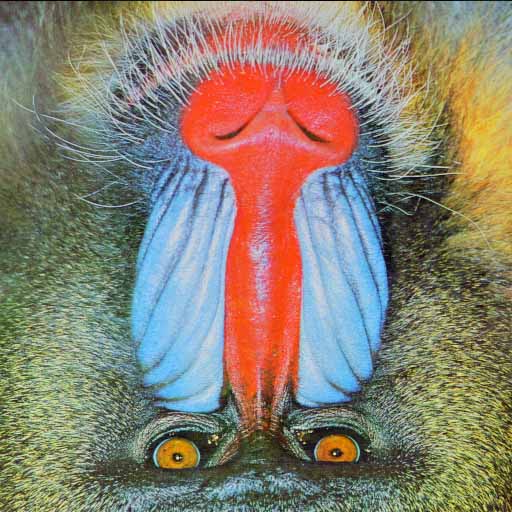

In [6]:
fromAxis = 1
toAxis = 0

rotatedAgain = ij.op().run("rotateView", rotated, fromAxis, toAxis)

ij.notebook().display(rotatedAgain)

Finally, it is important to note that `rotate()` can rotate any of an image's dimensions. Thus we can rotate the channel axis (dimension two) to a visible axis as well:

In [7]:
fromAxis = 2
toAxis = 1

rotated = ij.op().run("rotateView", input, fromAxis, toAxis)

ij.notebook().display(rotated)